In [1]:
from plot_graph import *

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [9]:
# obtain first batch of graphs
batch=graph_dataset[0]

print(f"first batch of graph dataset contains {len(batch)} jet graphs")

first batch of graph dataset contains 951 jet graphs


In [10]:
# get a smaller subset of the first batch for visualization

k=10
batch_small=batch[:k]
print(f"use first {k} jet graphs for visualization")


# initalize for plotting
m=nn.Softmax(1)
eta_idx,phi_idx=graph_dataset.features.index("track_etarel"),graph_dataset.features.index("track_phirel")


use first 10 jet graphs for visualization


In [5]:
def plot_graph(g,hbb_only=False):
    
    if hbb_only and g.y[0,0]>0:
        return
    
    fig, ax =plt.subplots(figsize=(12,10))
    
    g.batch=torch.tensor(np.zeros(g.x.shape[0]).astype("int64"))
    g.to(device)
    u,edge_attr=model(g.x, g.edge_index, g.batch)

    edge_attr=edge_attr.detach().cpu()
    weight=edge_attr.mean(1)

    g.weight=weight

    G = to_networkx(g, edge_attrs=['weight'])

    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    weights=np.array(weights)

    pos=np.array(list(zip(g.x[:,eta_idx].cpu().numpy(),g.x[:,phi_idx].cpu().numpy())))

    
    
    nodes = nx.draw_networkx_nodes(G,pos,node_color='k',edgecolors="orange",alpha=0.5, with_labels=False,node_size=g.x[:,0].detach().cpu())
    edges = nx.draw_networkx_edges(G,pos,edge_color=weights,width=1,
                                   edge_cmap=plt.cm.bwr, arrows=True,alpha=0.8,edge_vmin=-12,edge_vmax=12)

    

    edges = nx.draw_networkx_edges(G,pos,edge_color=weights,width=1,
                                   edge_cmap=plt.cm.bwr, arrows=False,alpha=0.8)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.bwr, norm=plt.Normalize(vmin=-12, vmax=12))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    
    plt.axis([-1,1,-1,1])
    

    ax.xaxis.set_major_locator(MultipleLocator(1/10))
    ax.yaxis.set_major_locator(MultipleLocator(1/10))
    
    ax.grid(which='major', color='#CCCCCC', linestyle='--')

    plt.grid(True)
    plt.xlabel("track_etarel")
    plt.ylabel("track_phirel")
    plt.title(f"jet label: {g.y.detach().cpu()}, prob: {m(u.detach().cpu())}")
    plt.show()
    
    return weights

### graphs for the first 10 jets

jet label: $[1,0] \rightarrow$ QCD, $[0,1] \rightarrow\enspace \text{H}\rightarrow\bar{\text{b}}\text{b}$ 

node size: `track_pt`


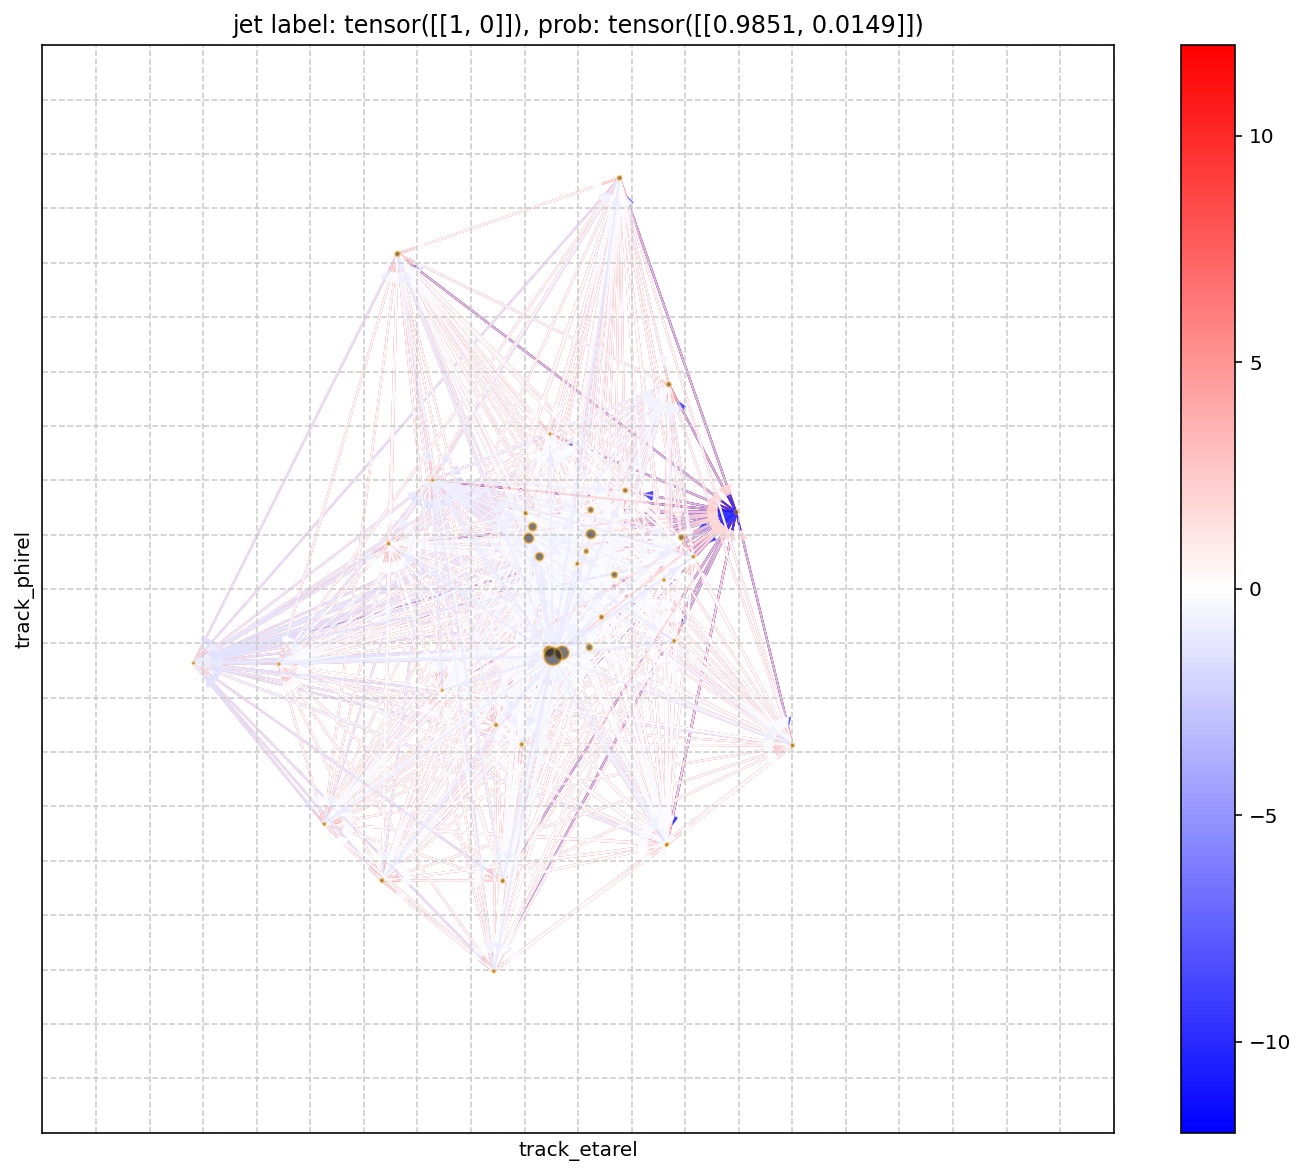

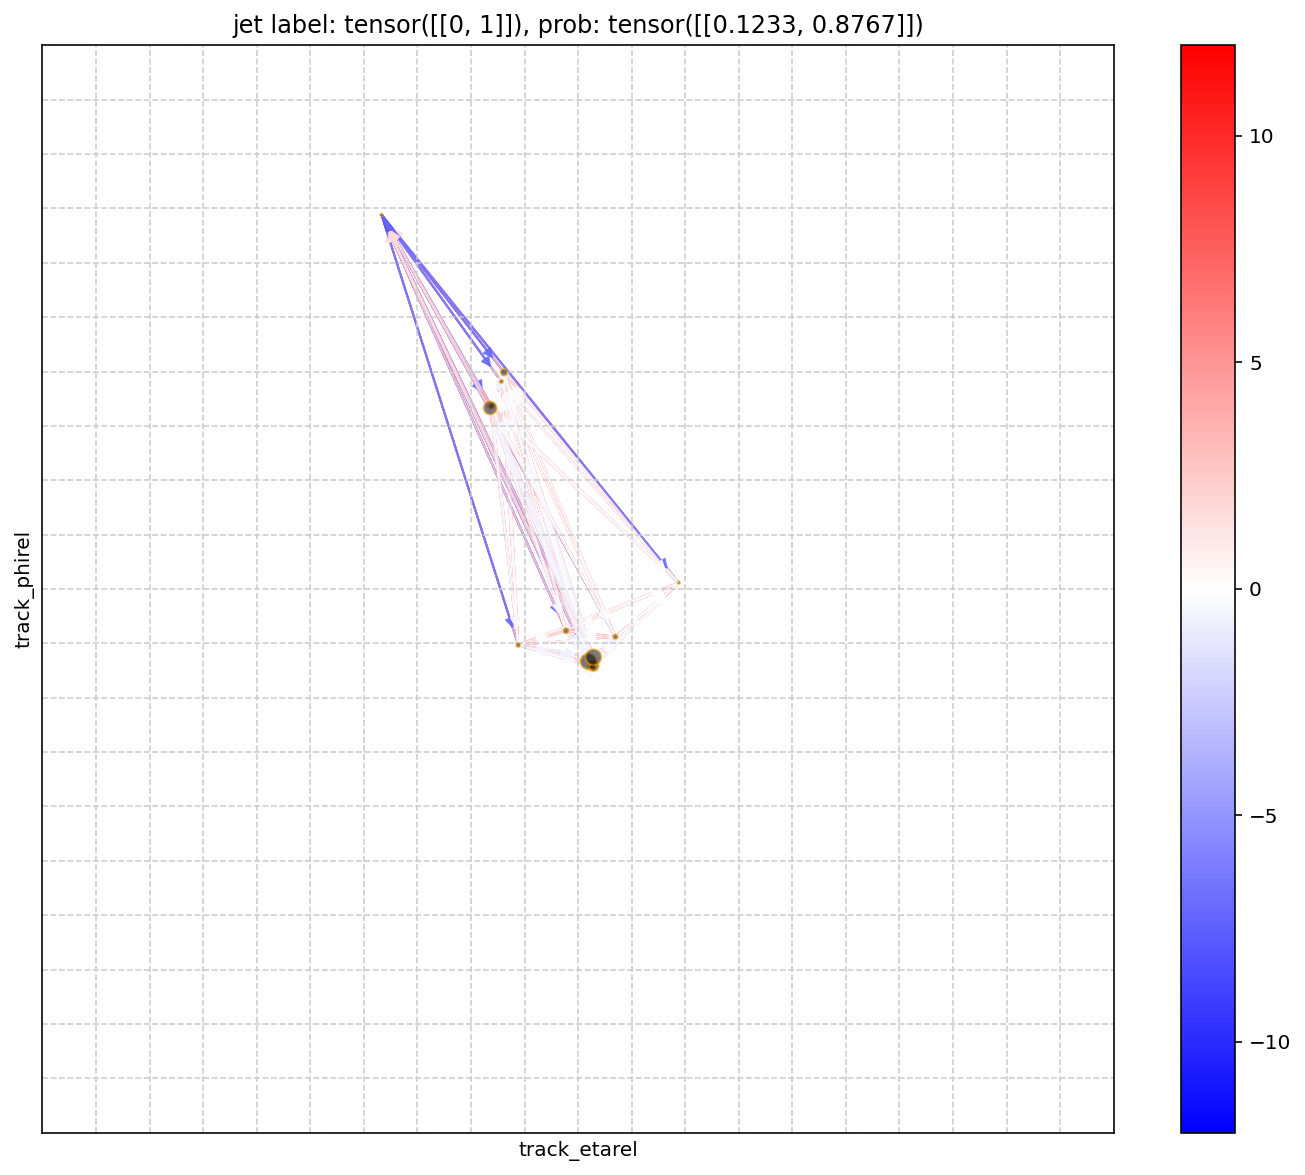

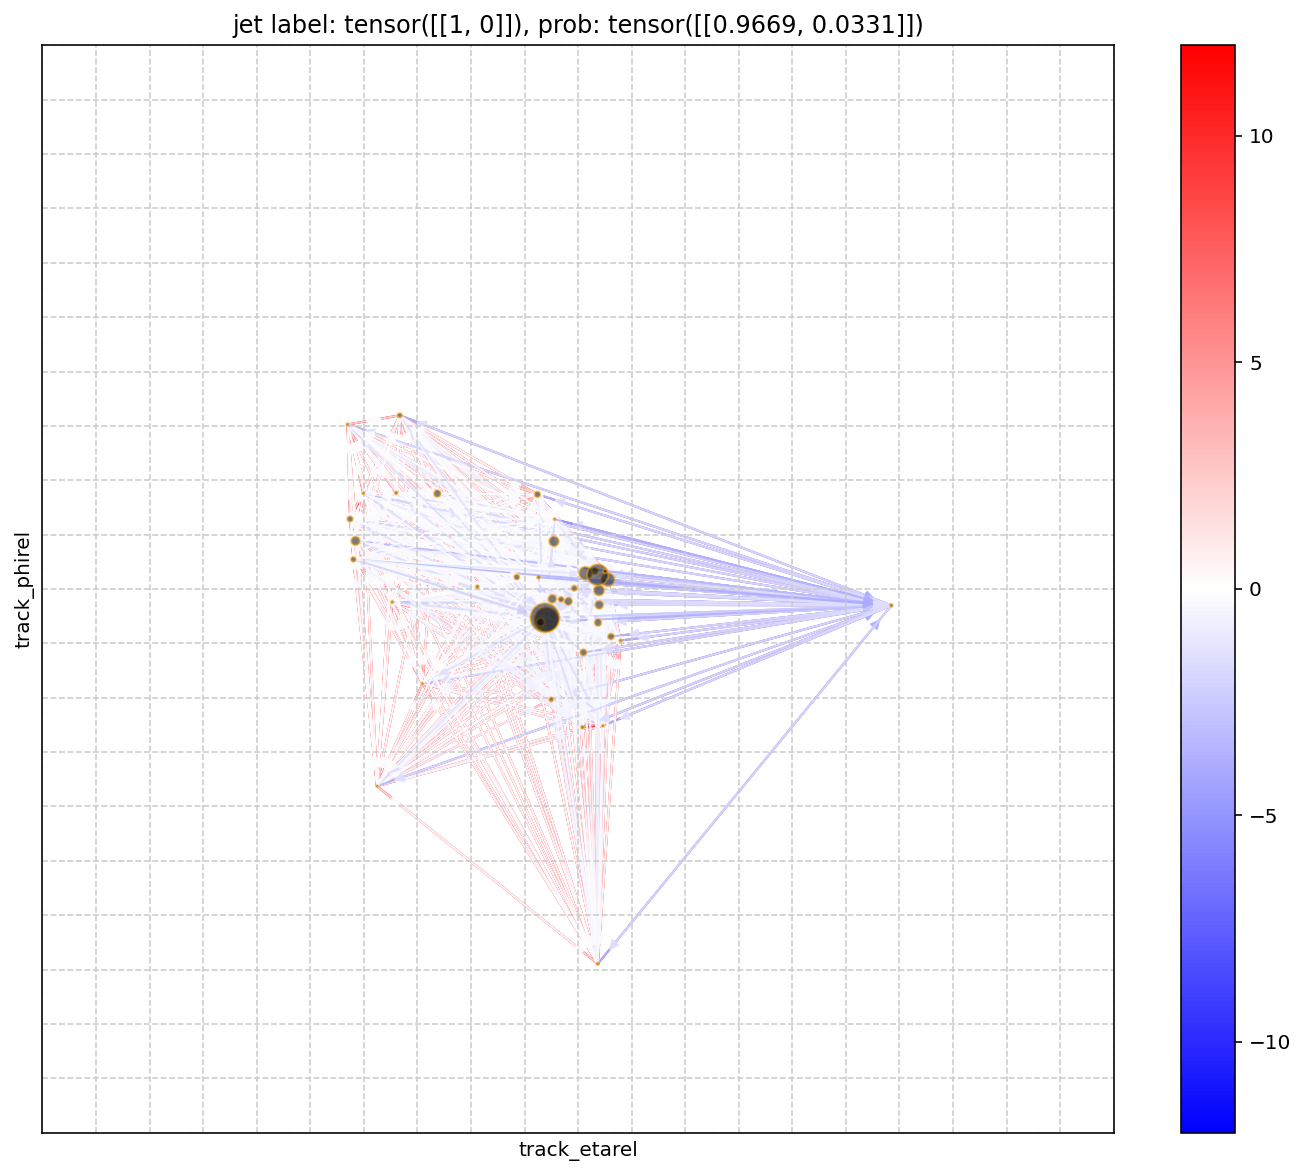

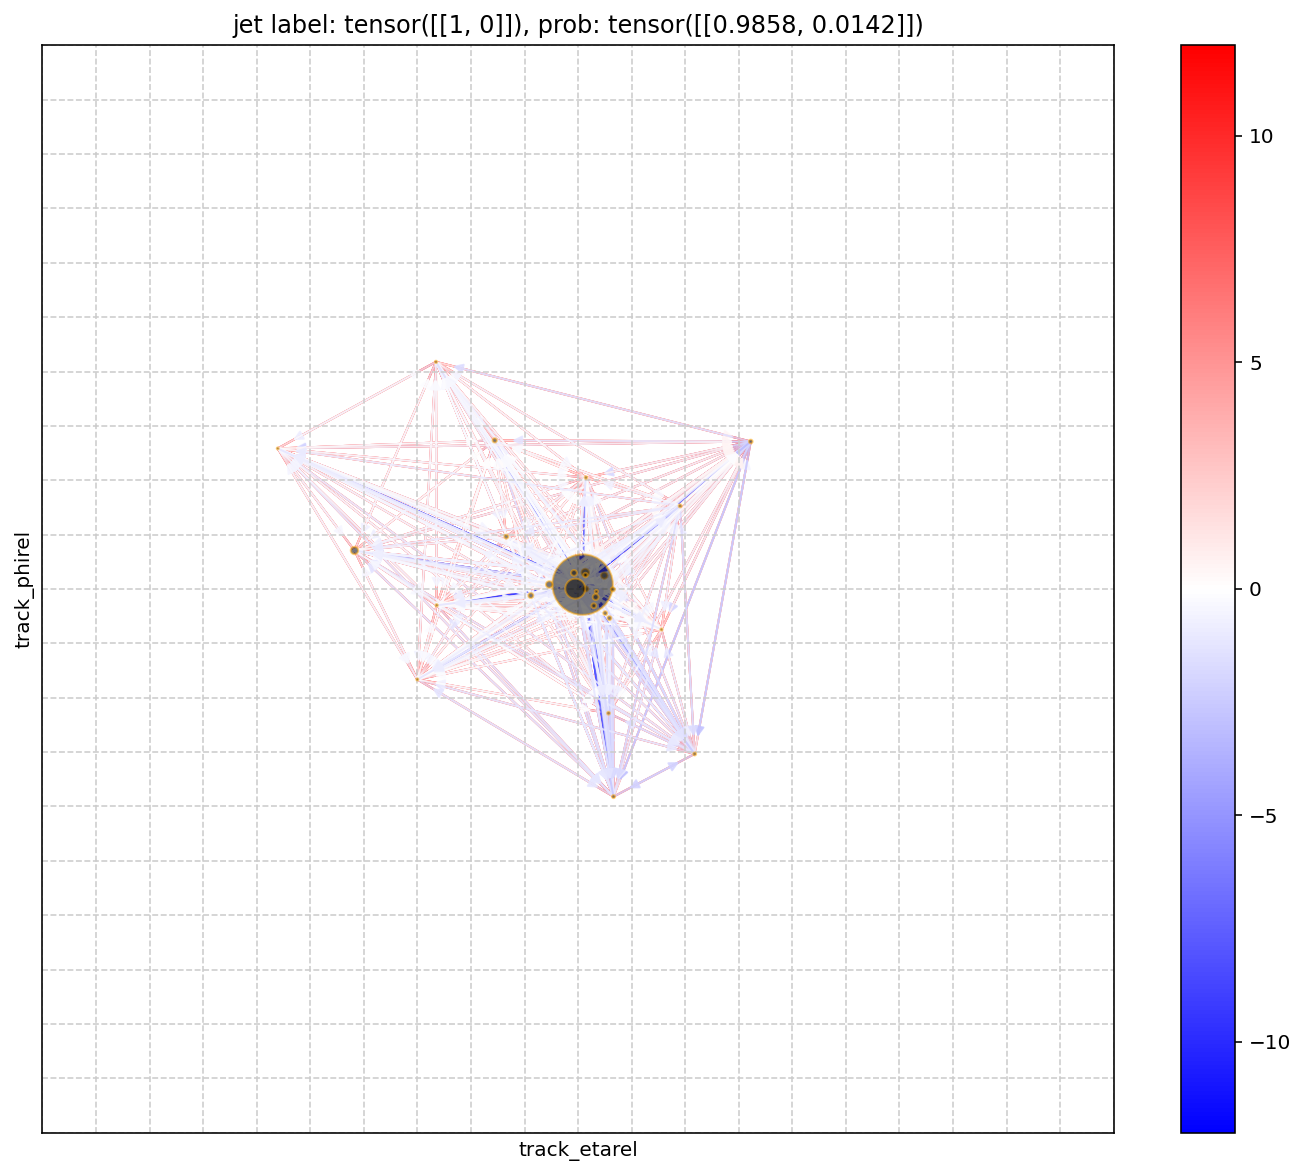

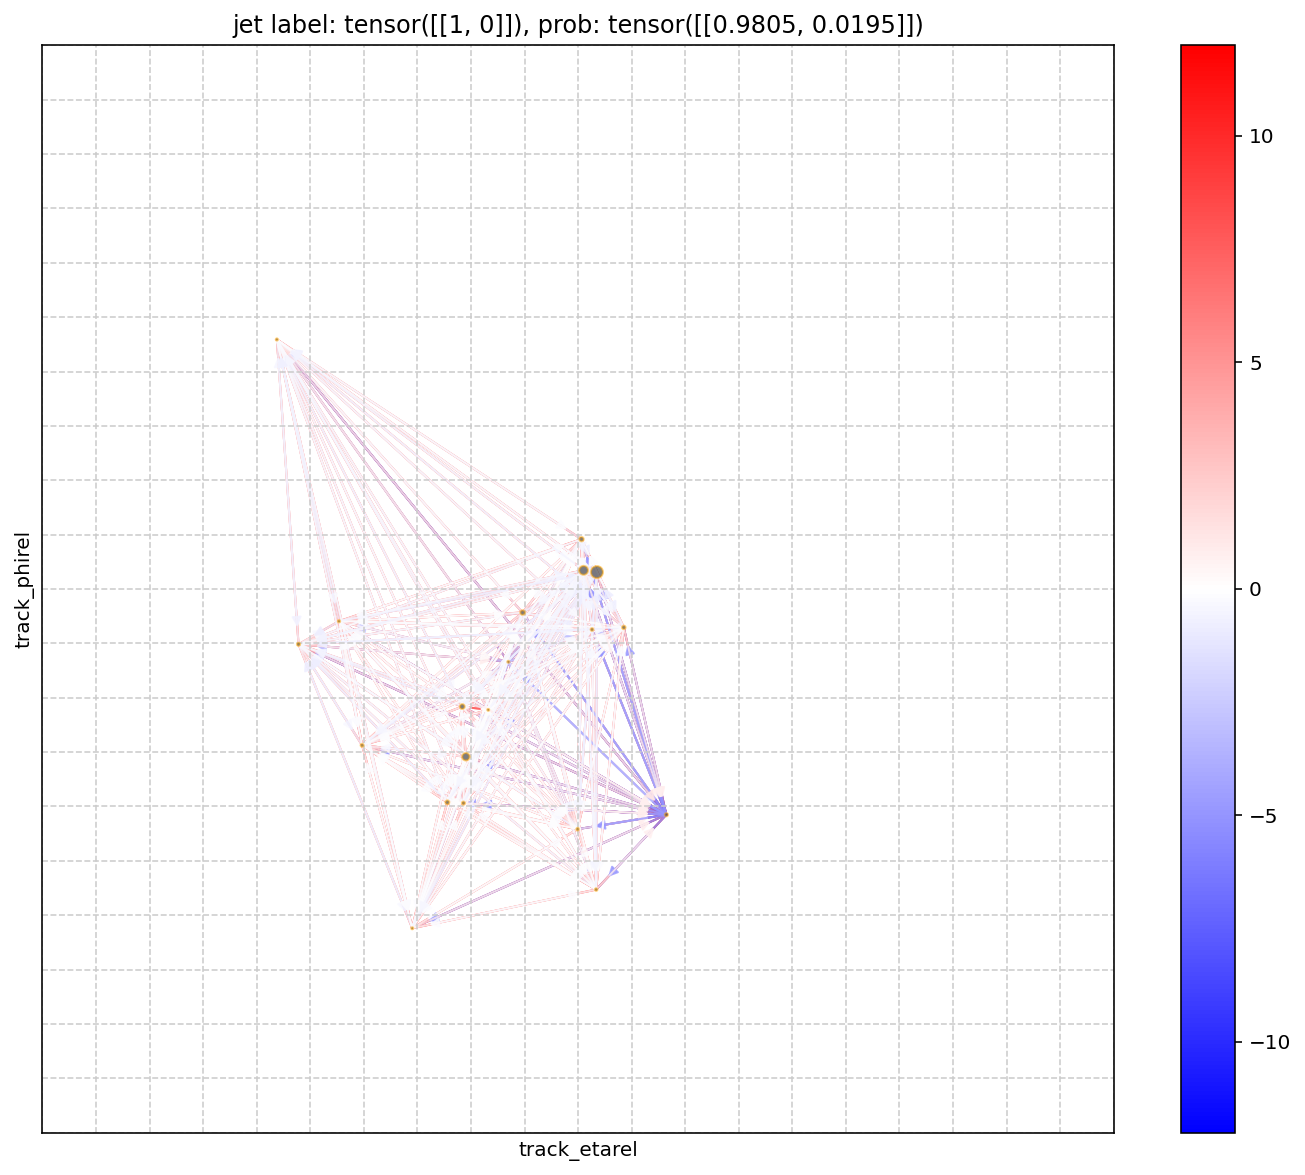

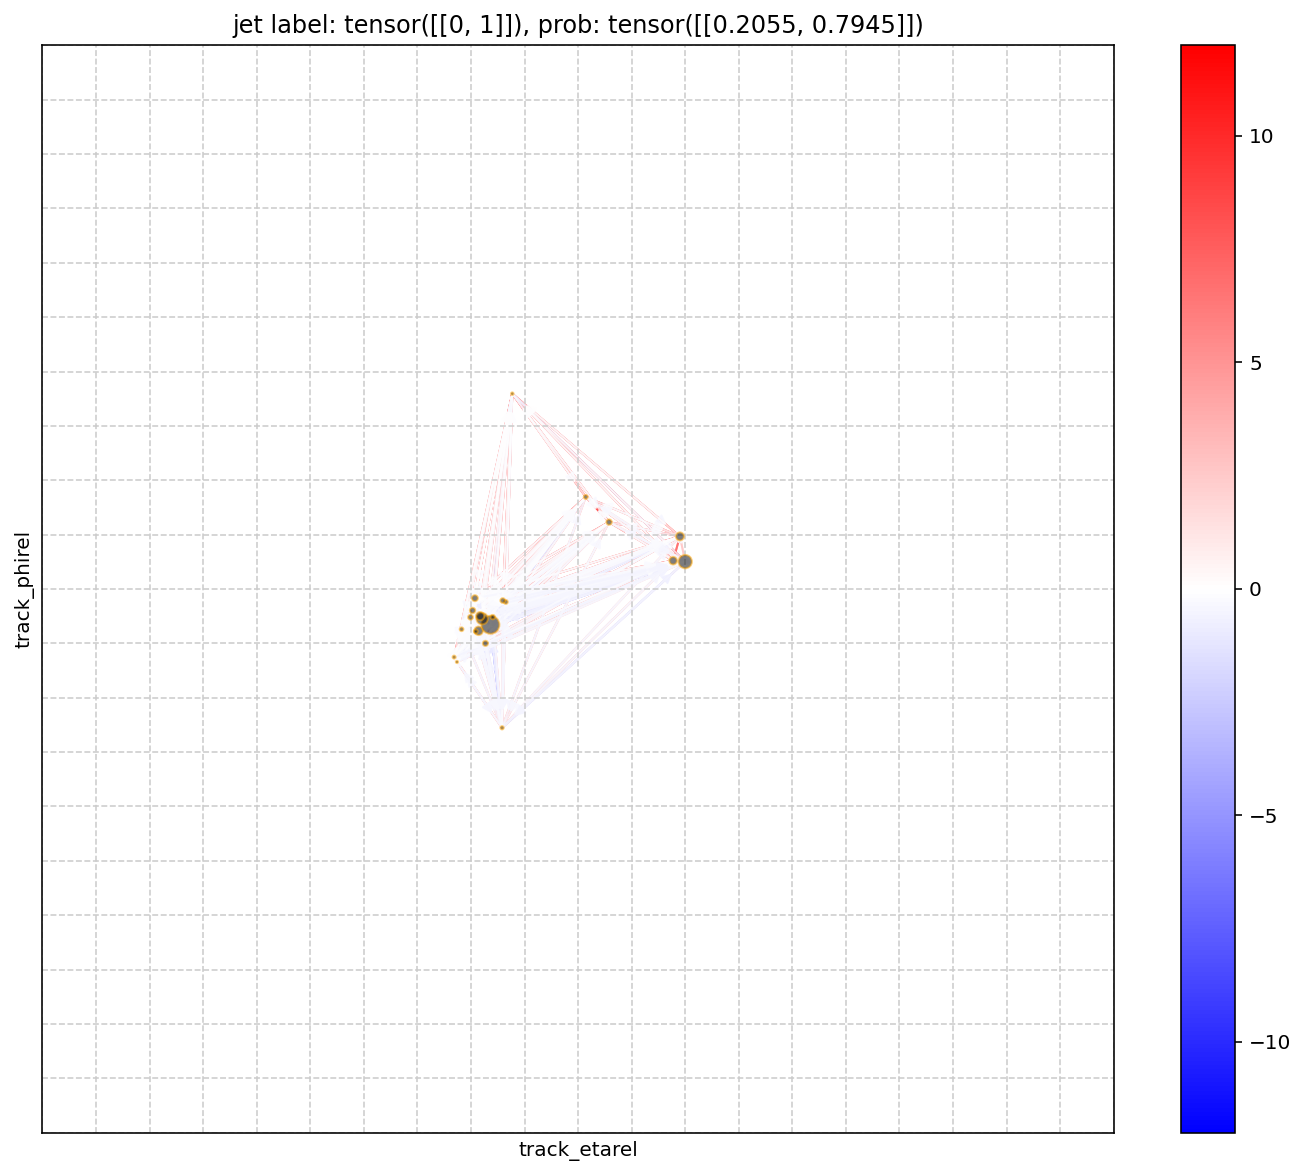

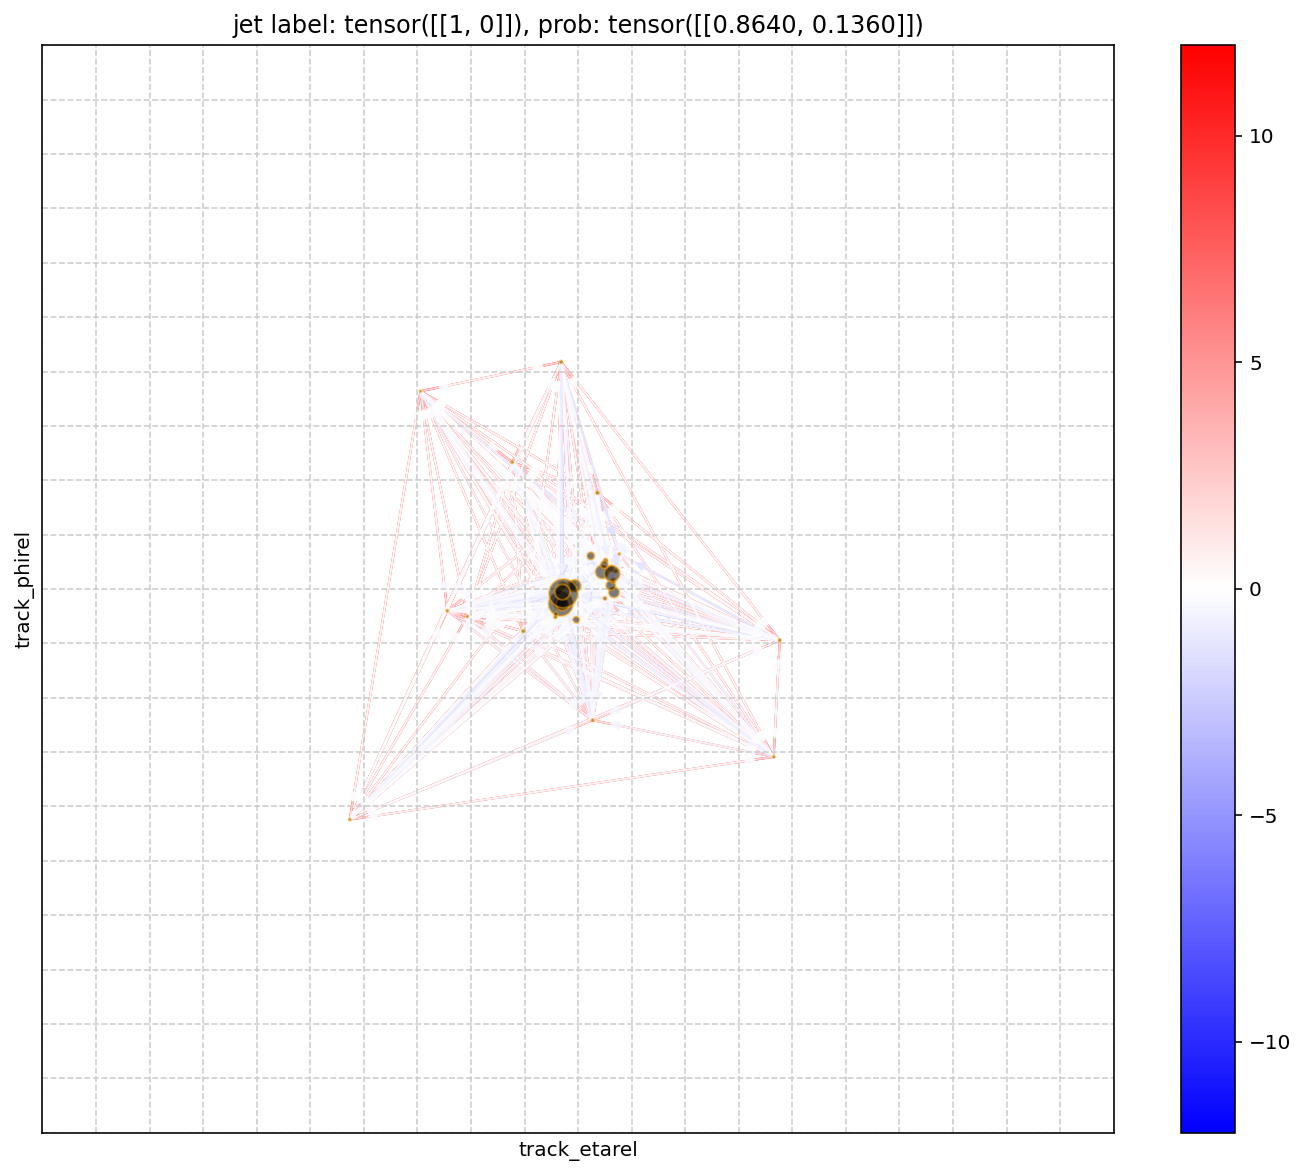

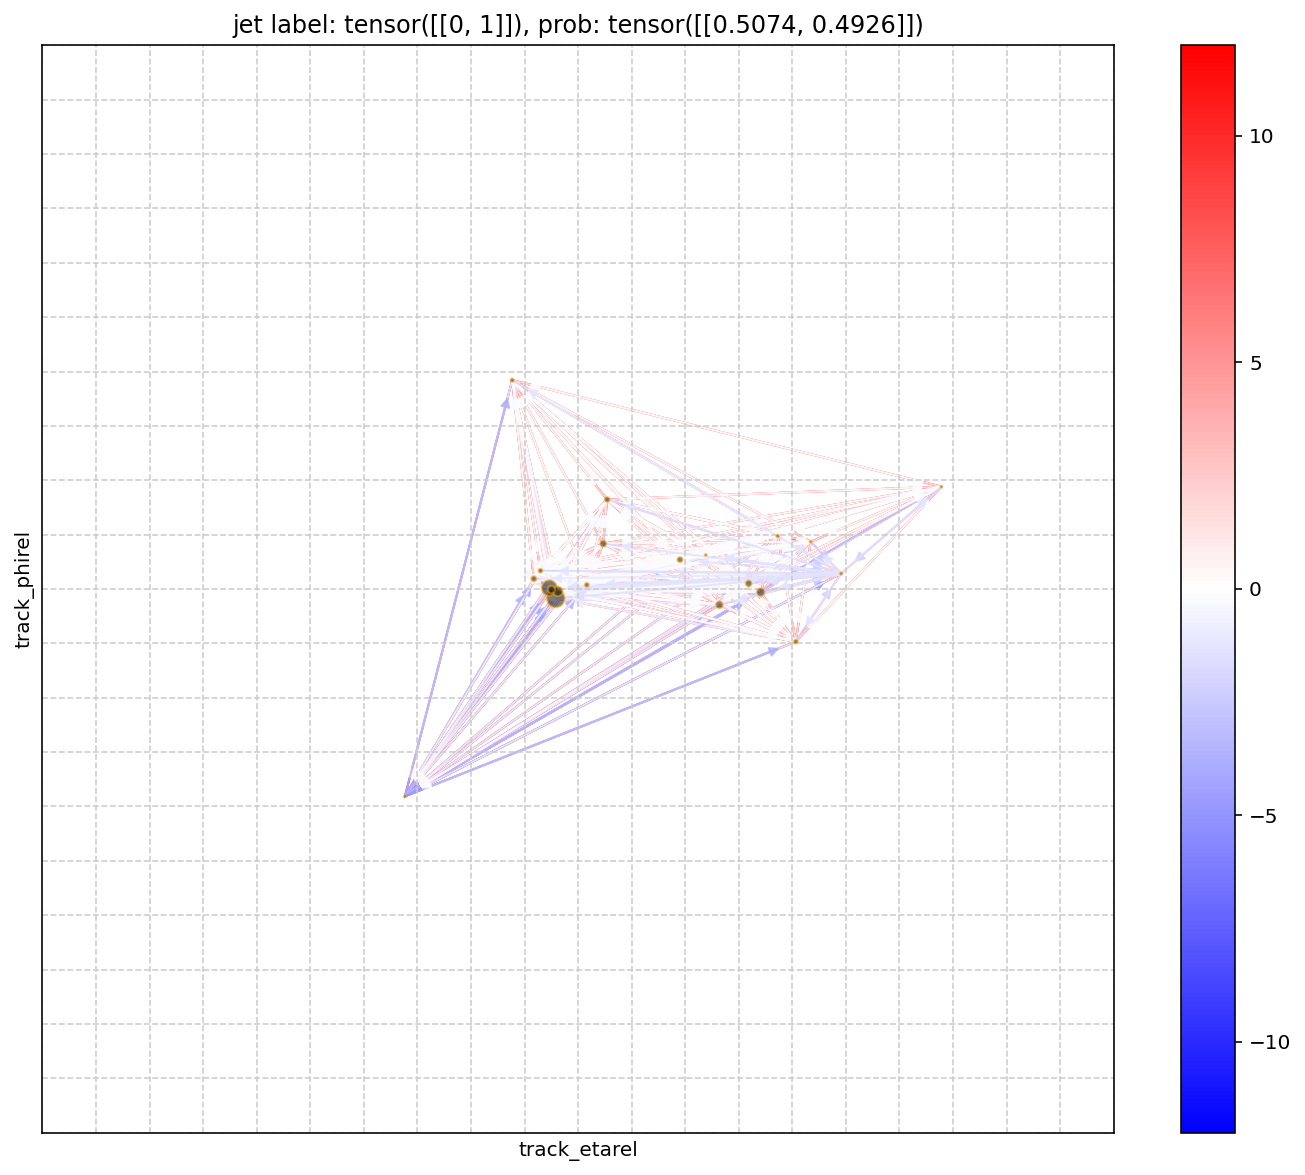

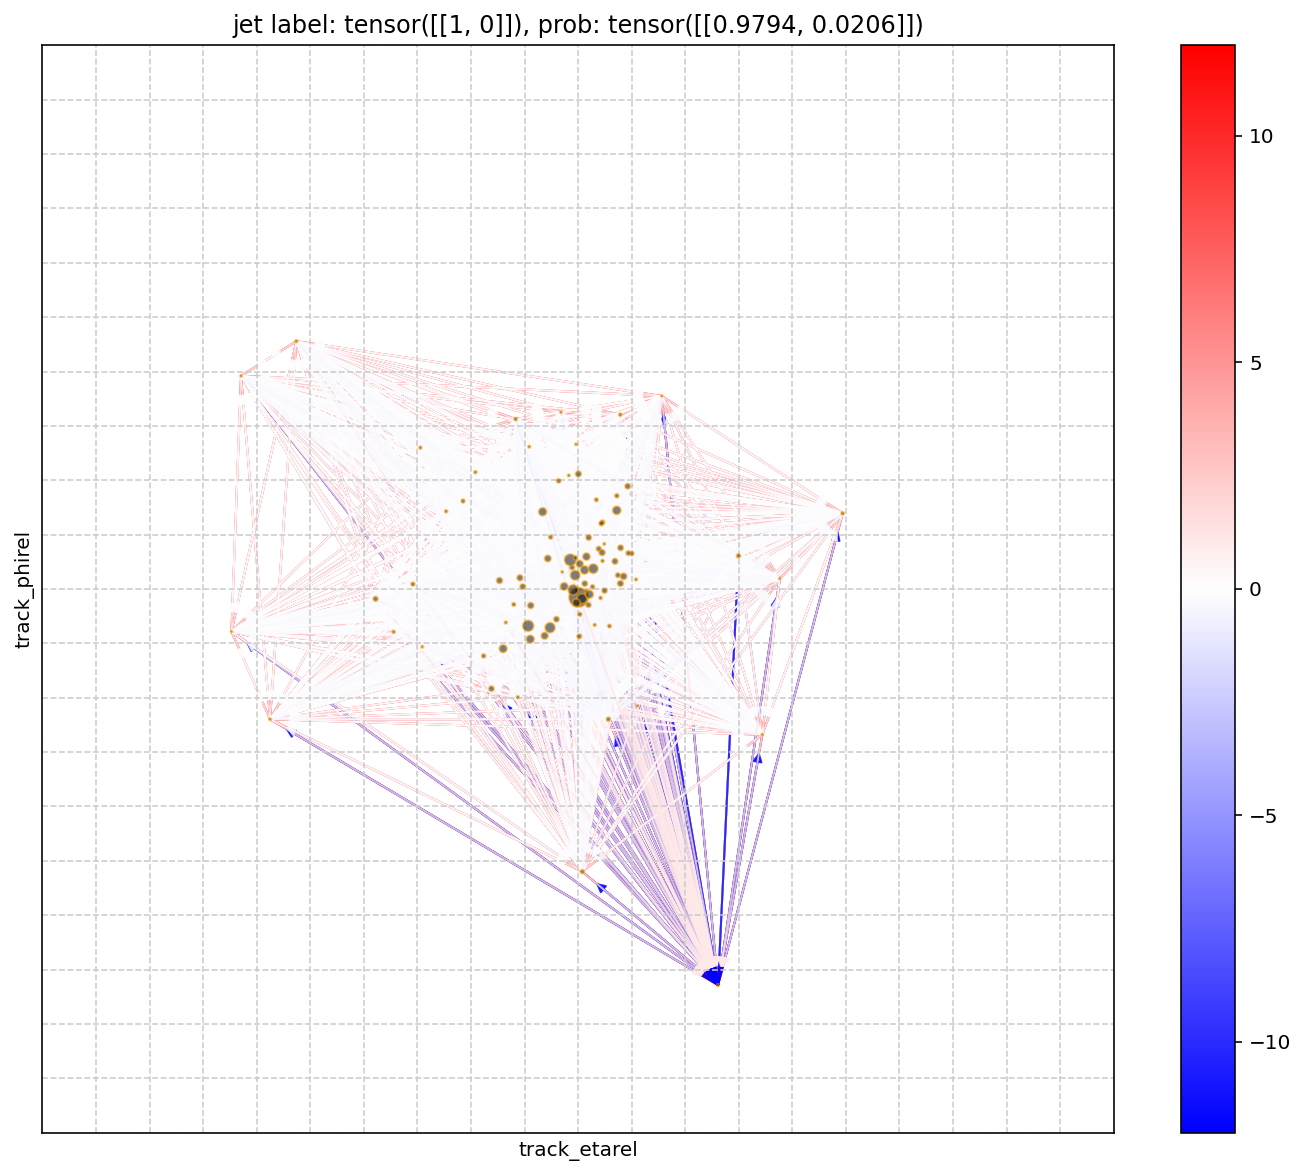

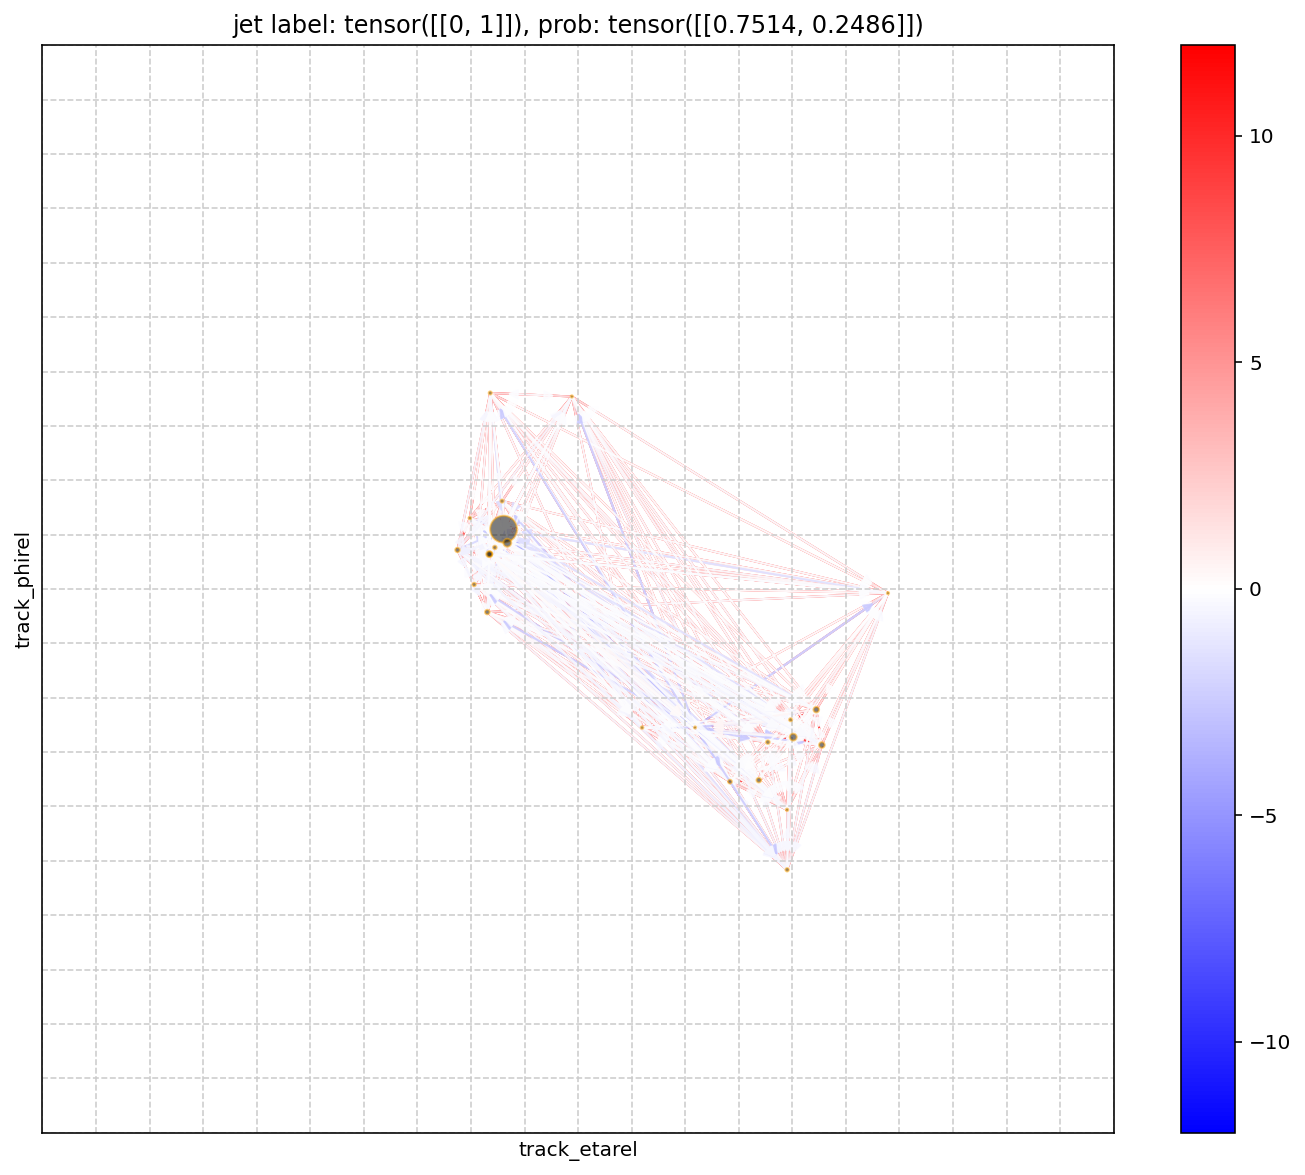

In [6]:
weights=[]
for g in batch_small:
    weights.append(plot_graph(g,False))

### histogram of edge weights

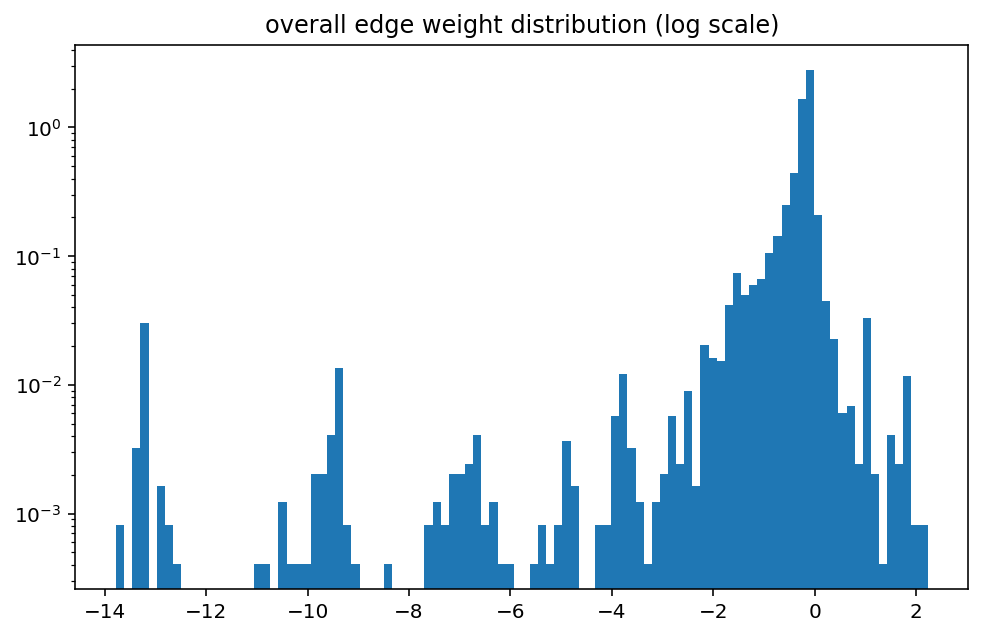

In [7]:
fig, ax =plt.subplots(figsize=(8,5))

plt.hist(np.hstack(weights),density=True,bins=100,log=True)
plt.title("overall edge weight distribution (log scale)")
plt.show()

Edge weight distribution normalized independently. QCD jet edge weights in blue and Hbb jet edge weights in orange.

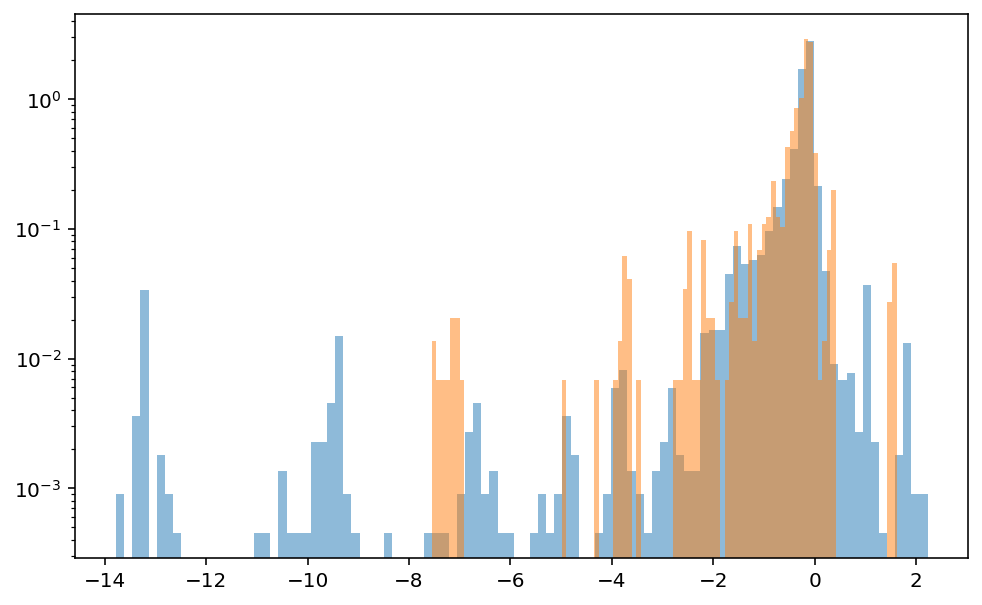

In [8]:
fig, ax =plt.subplots(figsize=(8,5))

plt.hist(np.hstack([w for i,w in enumerate(weights) if batch_small[i].y[0,0]>0]),density=True,bins=100,log=True,alpha=0.5)
plt.hist(np.hstack([w for i,w in enumerate(weights) if batch_small[i].y[0,1]>0]),density=True,bins=100,log=True,alpha=0.5)

plt.show()